In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow import keras
from keras.metrics import Precision,Recall,F1Score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(r"/content/Assessment - Form Responses.csv")
df.drop(columns=["Timestamp","Email Address"],axis=1,inplace=True)

In [ ]:
for col in df.columns:
    le = LabelEncoder()
    le = le.fit(df[col])
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.cluster import KMeans

obj = KMeans(n_clusters=2,n_init=5).fit(df)
clusters = obj.labels_

In [ ]:
df["labels"] = clusters
df

,How spontaneous are you?,Do you enjoy giving or receiving surprises?\n,\nHow important is music taste compatibility to you?\n,"How open are you to trying new things (food, travel, experiences)?",How much personal space do you need in a relationship?,How emotionally expressive are you?,How important is having similar long-term goals?,What’s your preferred mode of communication?,What’s your ideal time to hang out?,What is your ideal weekend plan?,labels
0,0,2,3,0,3,3,1,1,2,1,0
1,0,2,1,3,2,0,0,0,1,3,0
2,1,4,4,3,1,1,1,2,1,2,0
3,0,3,2,0,2,0,4,2,2,2,1
4,0,3,2,4,3,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
144,4,3,1,4,3,3,4,1,2,2,1
145,0,2,4,0,2,2,0,1,1,2,0
146,0,2,2,0,3,1,0,2,1,1,0
147,3,3,2,4,0,4,4,0,1,1,1


In [ ]:
x = df.drop(columns="labels",axis=1)
y = df["labels"]

In [ ]:
import optuna

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [ ]:
def objective(trails):
  model = Sequential()
  model.add(InputLayer(shape = (10,)))
  for i in range(trails.suggest_int('num_layers', 1, 4)):
    units= trails.suggest_int(f"units_{i+1}", 4,16)
    activation= trails.suggest_categorical(f"activation_{i+1}", ["relu", "tanh", "sigmoid",'PReLU'])
    if activation =='PReLU':
      model.add(Dense(units=units))
      model.add(PReLU())
    else:
      model.add(Dense(units=units,activation=activation))
  model.add(Dense(units=1, activation="sigmoid"))
  model.compile(optimizer=trails.suggest_categorical("optimizer", ["adam", "sgd","rmsprop","adagrad"]), loss= "binary_crossentropy", metrics=["accuracy",Precision(), Recall()])
  history = model.fit(x, y, epochs=30, batch_size = 8, validation_split=0.2)
  return history.history['val_loss'][-1]

In [ ]:
space = {
    "num_layers": [1, 2, 3],
    "units_1":    [4, 8, 12, 16],
    "activation_1": ["relu","tanh","sigmoid","PReLU"],
    "units_2":    [4, 8, 12, 16],
    "activation_2": ["relu","tanh","sigmoid","PReLU"],
    "units_3":    [4, 8, 12, 16],
    "activation_3": ["relu","tanh","sigmoid","PReLU"],
    "optimizer":  ["adam","sgd","rmsprop","adagrad"]
}
study = optuna.create_study(direction='minimize', sampler= optuna.samplers.GridSampler(space))

[I 2025-05-18 11:54:06,773] A new study created in memory with name: no-name-a96712a7-27b5-4d42-bd0f-b4c112d1abc8


In [ ]:
study.optimize(objective,n_trials=15)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5480 - loss: 0.6933 - precision_171: 0.4185 - recall_171: 0.7299 - val_accuracy: 0.5667 - val_loss: 0.6943 - val_precision_171: 0.4211 - val_recall_171: 0.8000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5964 - loss: 0.6934 - precision_171: 0.4768 - recall_171: 0.8905 - val_accuracy: 0.5667 - val_loss: 0.6940 - val_precision_171: 0.4211 - val_recall_171: 0.8000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5307 - loss: 0.6947 - precision_171: 0.4478 - recall_171: 0.7946 - val_accuracy: 0.6000 - val_loss: 0.6937 - val_precision_171: 0.4444 - val_recall_171: 0.8000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5814 - loss: 0.6943 - precision_171: 0.4477 - recall_171: 0.8230 - val_accuracy: 0.6000 - val_loss: 0.6935 - val_precision_171: 0.4444 - val_recall_171: 0.8000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5414 - loss: 0.6943 - precision_171: 0

[I 2025-05-18 11:54:17,465] Trial 0 finished with value: 0.6908833980560303 and parameters: {'num_layers': 3, 'units_1': 4, 'activation_1': 'relu', 'units_2': 4, 'activation_2': 'sigmoid', 'units_3': 4, 'activation_3': 'relu', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.6908833980560303.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6449 - loss: 0.7246 - precision_172: 0.0000e+00 - recall_172: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6197 - val_precision_172: 0.0000e+00 - val_recall_172: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6064 - loss: 0.7053 - precision_172: 0.0000e+00 - recall_172: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6018 - val_precision_172: 0.0000e+00 - val_recall_172: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6002 - loss: 0.6602 - precision_172: 0.0000e+00 - recall_172: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5854 - val_precision_172: 0.0000e+00 - val_recall_172: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6476 - loss: 0.6181 - precision_172: 0.0000e+00 - recall_172: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5672 - val_precision_172: 0.0000e+00 - val_recall_172: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━

[I 2025-05-18 11:54:29,387] Trial 1 finished with value: 0.31734856963157654 and parameters: {'num_layers': 3, 'units_1': 12, 'activation_1': 'tanh', 'units_2': 4, 'activation_2': 'relu', 'units_3': 16, 'activation_3': 'relu', 'optimizer': 'adam'}. Best is trial 1 with value: 0.31734856963157654.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6222 - loss: 0.6448 - precision_173: 0.0000e+00 - recall_173: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6290 - val_precision_173: 0.0000e+00 - val_recall_173: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5776 - loss: 0.6612 - precision_173: 0.0000e+00 - recall_173: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6287 - val_precision_173: 0.0000e+00 - val_recall_173: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5708 - loss: 0.6694 - precision_173: 0.0000e+00 - recall_173: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6285 - val_precision_173: 0.0000e+00 - val_recall_173: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5956 - loss: 0.6642 - precision_173: 0.0000e+00 - recall_173: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6282 - val_precision_173: 0.0000e+00 - val_recall_173: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━

[I 2025-05-18 11:54:40,120] Trial 2 finished with value: 0.6229857206344604 and parameters: {'num_layers': 3, 'units_1': 4, 'activation_1': 'sigmoid', 'units_2': 8, 'activation_2': 'PReLU', 'units_3': 8, 'activation_3': 'tanh', 'optimizer': 'adagrad'}. Best is trial 1 with value: 0.31734856963157654.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4144 - loss: 0.7249 - precision_174: 0.4113 - recall_174: 0.9793 - val_accuracy: 0.4333 - val_loss: 0.7074 - val_precision_174: 0.3600 - val_recall_174: 0.9000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4590 - loss: 0.7005 - precision_174: 0.3944 - recall_174: 0.8350 - val_accuracy: 0.5000 - val_loss: 0.6959 - val_precision_174: 0.3810 - val_recall_174: 0.8000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5776 - loss: 0.6906 - precision_174: 0.5069 - recall_174: 0.7239 - val_accuracy: 0.5667 - val_loss: 0.6901 - val_precision_174: 0.4000 - val_recall_174: 0.6000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5379 - loss: 0.6909 - precision_174: 0.3851 - recall_174: 0.4136 - val_accuracy: 0.5667 - val_loss: 0.6862 - val_precision_174: 0.3636 - val_recall_174: 0.4000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6004 - loss: 0.6858 - precision_174: 0.

[I 2025-05-18 11:54:51,383] Trial 3 finished with value: 0.30604326725006104 and parameters: {'num_layers': 3, 'units_1': 16, 'activation_1': 'sigmoid', 'units_2': 4, 'activation_2': 'relu', 'units_3': 16, 'activation_3': 'PReLU', 'optimizer': 'rmsprop'}. Best is trial 3 with value: 0.30604326725006104.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3116 - loss: 0.7438 - precision_175: 0.2662 - recall_175: 0.3189 - val_accuracy: 0.4333 - val_loss: 0.7217 - val_precision_175: 0.2308 - val_recall_175: 0.3000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4133 - loss: 0.7204 - precision_175: 0.3069 - recall_175: 0.4372 - val_accuracy: 0.5000 - val_loss: 0.7042 - val_precision_175: 0.3077 - val_recall_175: 0.4000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4360 - loss: 0.7093 - precision_175: 0.3482 - recall_175: 0.5161 - val_accuracy: 0.6333 - val_loss: 0.6889 - val_precision_175: 0.4615 - val_recall_175: 0.6000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6031 - loss: 0.6861 - precision_175: 0.5039 - recall_175: 0.6966 - val_accuracy: 0.7000 - val_loss: 0.6763 - val_precision_175: 0.5385 - val_recall_175: 0.7000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6681 - loss: 0.6596 - precision_175: 0

[I 2025-05-18 11:54:59,345] Trial 4 finished with value: 0.2900206744670868 and parameters: {'num_layers': 3, 'units_1': 8, 'activation_1': 'tanh', 'units_2': 8, 'activation_2': 'relu', 'units_3': 16, 'activation_3': 'PReLU', 'optimizer': 'sgd'}. Best is trial 4 with value: 0.2900206744670868.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5851 - loss: 0.7448 - precision_176: 0.0000e+00 - recall_176: 0.0000e+00 - val_accuracy: 0.6333 - val_loss: 0.6666 - val_precision_176: 0.0000e+00 - val_recall_176: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5267 - loss: 0.7830 - precision_176: 0.0000e+00 - recall_176: 0.0000e+00 - val_accuracy: 0.6333 - val_loss: 0.6622 - val_precision_176: 0.0000e+00 - val_recall_176: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5468 - loss: 0.7709 - precision_176: 0.0000e+00 - recall_176: 0.0000e+00 - val_accuracy: 0.6333 - val_loss: 0.6588 - val_precision_176: 0.0000e+00 - val_recall_176: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5259 - loss: 0.7955 - precision_176: 0.5938 - recall_176: 0.0375 - val_accuracy: 0.6333 - val_loss: 0.6560 - val_precision_176: 0.0000e+00 - val_recall_176: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13m

[I 2025-05-18 11:55:08,877] Trial 5 finished with value: 0.627143919467926 and parameters: {'num_layers': 2, 'units_1': 8, 'activation_1': 'tanh', 'units_2': 4, 'activation_2': 'PReLU', 'optimizer': 'adagrad'}. Best is trial 4 with value: 0.2900206744670868.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4808 - loss: 0.7111 - precision_177: 0.2006 - recall_177: 0.0754 - val_accuracy: 0.5667 - val_loss: 0.6577 - val_precision_177: 0.2000 - val_recall_177: 0.1000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5332 - loss: 0.6917 - precision_177: 0.3835 - recall_177: 0.1650 - val_accuracy: 0.6000 - val_loss: 0.6481 - val_precision_177: 0.2500 - val_recall_177: 0.1000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5225 - loss: 0.6921 - precision_177: 0.4201 - recall_177: 0.1550 - val_accuracy: 0.6000 - val_loss: 0.6391 - val_precision_177: 0.2500 - val_recall_177: 0.1000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5397 - loss: 0.6975 - precision_177: 0.5266 - recall_177: 0.2206 - val_accuracy: 0.6000 - val_loss: 0.6303 - val_precision_177: 0.2500 - val_recall_177: 0.1000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6383 - loss: 0.6601 - precision_177: 0

[I 2025-05-18 11:55:18,148] Trial 6 finished with value: 0.42581456899642944 and parameters: {'num_layers': 2, 'units_1': 8, 'activation_1': 'sigmoid', 'units_2': 4, 'activation_2': 'tanh', 'optimizer': 'sgd'}. Best is trial 4 with value: 0.2900206744670868.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5811 - loss: 0.6398 - precision_178: 0.0000e+00 - recall_178: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5979 - val_precision_178: 0.0000e+00 - val_recall_178: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6502 - loss: 0.5954 - precision_178: 0.0000e+00 - recall_178: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5817 - val_precision_178: 0.0000e+00 - val_recall_178: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6518 - loss: 0.5717 - precision_178: 1.0000 - recall_178: 0.0938 - val_accuracy: 0.6667 - val_loss: 0.5636 - val_precision_178: 0.0000e+00 - val_recall_178: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6000 - loss: 0.5991 - precision_178: 0.9375 - recall_178: 0.2039 - val_accuracy: 0.6667 - val_loss: 0.5456 - val_precision_178: 0.0000e+00 - val_recall_178: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - a

[I 2025-05-18 11:55:27,414] Trial 7 finished with value: 0.22792291641235352 and parameters: {'num_layers': 2, 'units_1': 16, 'activation_1': 'sigmoid', 'units_2': 8, 'activation_2': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 7 with value: 0.22792291641235352.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3602 - loss: 0.8145 - precision_179: 0.3585 - recall_179: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7556 - val_precision_179: 0.3333 - val_recall_179: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4299 - loss: 0.7404 - precision_179: 0.4053 - recall_179: 0.9894 - val_accuracy: 0.5333 - val_loss: 0.6985 - val_precision_179: 0.4091 - val_recall_179: 0.9000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6324 - loss: 0.6825 - precision_179: 0.5655 - recall_179: 0.9346 - val_accuracy: 0.6667 - val_loss: 0.6553 - val_precision_179: 0.5000 - val_recall_179: 0.7000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6952 - loss: 0.6562 - precision_179: 0.5927 - recall_179: 0.7452 - val_accuracy: 0.7000 - val_loss: 0.6206 - val_precision_179: 0.6000 - val_recall_179: 0.3000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7309 - loss: 0.6250 - precision_179: 0

[I 2025-05-18 11:55:37,979] Trial 8 finished with value: 0.2591764032840729 and parameters: {'num_layers': 2, 'units_1': 8, 'activation_1': 'PReLU', 'units_2': 12, 'activation_2': 'sigmoid', 'optimizer': 'adam'}. Best is trial 7 with value: 0.22792291641235352.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.3804 - loss: 0.7562 - precision_180: 0.3804 - recall_180: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7664 - val_precision_180: 0.3333 - val_recall_180: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4296 - loss: 0.7248 - precision_180: 0.4296 - recall_180: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7512 - val_precision_180: 0.3333 - val_recall_180: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4595 - loss: 0.6996 - precision_180: 0.4595 - recall_180: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7359 - val_precision_180: 0.3333 - val_recall_180: 1.0000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4480 - loss: 0.6967 - precision_180: 0.4455 - recall_180: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7213 - val_precision_180: 0.3333 - val_recall_180: 1.0000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4076 - loss: 0.7014 - precision_180: 

[I 2025-05-18 11:55:48,428] Trial 9 finished with value: 0.5696707963943481 and parameters: {'num_layers': 2, 'units_1': 4, 'activation_1': 'sigmoid', 'units_2': 4, 'activation_2': 'sigmoid', 'optimizer': 'adam'}. Best is trial 7 with value: 0.22792291641235352.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6410 - loss: 0.6584 - precision_181: 0.5389 - recall_181: 0.8716 - val_accuracy: 0.7333 - val_loss: 0.6501 - val_precision_181: 0.5833 - val_recall_181: 0.7000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7289 - loss: 0.6455 - precision_181: 0.6294 - recall_181: 0.7962 - val_accuracy: 0.7667 - val_loss: 0.6348 - val_precision_181: 0.6667 - val_recall_181: 0.6000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7625 - loss: 0.6350 - precision_181: 0.6294 - recall_181: 0.6458 - val_accuracy: 0.7667 - val_loss: 0.6212 - val_precision_181: 0.6667 - val_recall_181: 0.6000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8250 - loss: 0.6151 - precision_181: 0.7466 - recall_181: 0.8593 - val_accuracy: 0.8000 - val_loss: 0.6086 - val_precision_181: 0.7500 - val_recall_181: 0.6000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7705 - loss: 0.6031 - precision_181: 

[I 2025-05-18 11:55:56,897] Trial 10 finished with value: 0.33366742730140686 and parameters: {'num_layers': 3, 'units_1': 8, 'activation_1': 'PReLU', 'units_2': 4, 'activation_2': 'tanh', 'units_3': 16, 'activation_3': 'relu', 'optimizer': 'sgd'}. Best is trial 7 with value: 0.22792291641235352.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5654 - loss: 0.7539 - precision_182: 0.2351 - recall_182: 0.0380 - val_accuracy: 0.5667 - val_loss: 0.7022 - val_precision_182: 0.2000 - val_recall_182: 0.1000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5647 - loss: 0.6806 - precision_182: 0.5305 - recall_182: 0.3484 - val_accuracy: 0.6333 - val_loss: 0.6813 - val_precision_182: 0.4444 - val_recall_182: 0.4000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6557 - loss: 0.6616 - precision_182: 0.5962 - recall_182: 0.5405 - val_accuracy: 0.6667 - val_loss: 0.6627 - val_precision_182: 0.5000 - val_recall_182: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7255 - loss: 0.5854 - precision_182: 0.6228 - recall_182: 0.7705 - val_accuracy: 0.6667 - val_loss: 0.6406 - val_precision_182: 0.5000 - val_recall_182: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7234 - loss: 0.5690 - precision_182: 0.

[I 2025-05-18 11:56:05,556] Trial 11 finished with value: 0.23567023873329163 and parameters: {'num_layers': 3, 'units_1': 16, 'activation_1': 'relu', 'units_2': 12, 'activation_2': 'PReLU', 'units_3': 4, 'activation_3': 'tanh', 'optimizer': 'sgd'}. Best is trial 7 with value: 0.22792291641235352.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4464 - loss: 0.7469 - precision_183: 0.2465 - recall_183: 0.1013 - val_accuracy: 0.6000 - val_loss: 0.6307 - val_precision_183: 0.2500 - val_recall_183: 0.1000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6627 - loss: 0.6298 - precision_183: 0.5248 - recall_183: 0.3658 - val_accuracy: 0.8000 - val_loss: 0.5846 - val_precision_183: 0.7500 - val_recall_183: 0.6000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7213 - loss: 0.5906 - precision_183: 0.6820 - recall_183: 0.7138 - val_accuracy: 0.8667 - val_loss: 0.5472 - val_precision_183: 0.8750 - val_recall_183: 0.7000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7902 - loss: 0.5701 - precision_183: 0.7447 - recall_183: 0.7680 - val_accuracy: 0.9333 - val_loss: 0.5141 - val_precision_183: 1.0000 - val_recall_183: 0.8000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8427 - loss: 0.5087 - precision_183: 0.

[I 2025-05-18 11:56:13,743] Trial 12 finished with value: 0.2099936455488205 and parameters: {'num_layers': 2, 'units_1': 12, 'activation_1': 'PReLU', 'units_2': 12, 'activation_2': 'tanh', 'optimizer': 'sgd'}. Best is trial 12 with value: 0.2099936455488205.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6841 - loss: 0.6192 - precision_184: 0.0000e+00 - recall_184: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6372 - val_precision_184: 0.0000e+00 - val_recall_184: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6086 - loss: 0.6650 - precision_184: 0.0000e+00 - recall_184: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6368 - val_precision_184: 0.0000e+00 - val_recall_184: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6237 - loss: 0.6484 - precision_184: 0.0000e+00 - recall_184: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6364 - val_precision_184: 0.0000e+00 - val_recall_184: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5948 - loss: 0.6619 - precision_184: 0.0000e+00 - recall_184: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6354 - val_precision_184: 0.0000e+00 - val_recall_184: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 

[I 2025-05-18 11:56:22,700] Trial 13 finished with value: 0.4483148455619812 and parameters: {'num_layers': 3, 'units_1': 4, 'activation_1': 'PReLU', 'units_2': 4, 'activation_2': 'sigmoid', 'units_3': 12, 'activation_3': 'tanh', 'optimizer': 'sgd'}. Best is trial 12 with value: 0.2099936455488205.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6251 - loss: 0.7983 - precision_185: 0.0000e+00 - recall_185: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.7451 - val_precision_185: 0.0000e+00 - val_recall_185: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6383 - loss: 0.7866 - precision_185: 0.0000e+00 - recall_185: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.7425 - val_precision_185: 0.0000e+00 - val_recall_185: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6311 - loss: 0.8050 - precision_185: 0.0000e+00 - recall_185: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.7402 - val_precision_185: 0.0000e+00 - val_recall_185: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6201 - loss: 0.7990 - precision_185: 0.0000e+00 - recall_185: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.7381 - val_precision_185: 0.0000e+00 - val_recall_185: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

[I 2025-05-18 11:56:31,353] Trial 14 finished with value: 0.7069450616836548 and parameters: {'num_layers': 2, 'units_1': 16, 'activation_1': 'tanh', 'units_2': 12, 'activation_2': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 12 with value: 0.2099936455488205.


In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_activation_1,params_activation_2,params_activation_3,params_num_layers,params_optimizer,params_units_1,params_units_2,params_units_3,system_attrs_grid_id,system_attrs_search_space,state
0,0,0.690883,2025-05-18 11:54:07.398434,2025-05-18 11:54:17.464610,0 days 00:00:10.066176,relu,sigmoid,relu,3,adagrad,4,4,4.0,0,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
1,1,0.317349,2025-05-18 11:54:17.465968,2025-05-18 11:54:29.386851,0 days 00:00:11.920883,tanh,relu,relu,3,adam,12,4,16.0,1,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
2,2,0.622986,2025-05-18 11:54:29.388194,2025-05-18 11:54:40.120255,0 days 00:00:10.732061,sigmoid,PReLU,tanh,3,adagrad,4,8,8.0,2,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
3,3,0.306043,2025-05-18 11:54:40.122202,2025-05-18 11:54:51.383315,0 days 00:00:11.261113,sigmoid,relu,PReLU,3,rmsprop,16,4,16.0,3,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
4,4,0.290021,2025-05-18 11:54:51.384738,2025-05-18 11:54:59.344614,0 days 00:00:07.959876,tanh,relu,PReLU,3,sgd,8,8,16.0,4,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
5,5,0.627144,2025-05-18 11:54:59.346005,2025-05-18 11:55:08.877198,0 days 00:00:09.531193,tanh,PReLU,NaN,2,adagrad,8,4,NaN,5,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
6,6,0.425815,2025-05-18 11:55:08.878902,2025-05-18 11:55:18.148109,0 days 00:00:09.269207,sigmoid,tanh,NaN,2,sgd,8,4,NaN,6,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
7,7,0.227923,2025-05-18 11:55:18.149595,2025-05-18 11:55:27.413463,0 days 00:00:09.263868,sigmoid,tanh,NaN,2,rmsprop,16,8,NaN,7,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
8,8,0.259176,2025-05-18 11:55:27.417115,2025-05-18 11:55:37.978710,0 days 00:00:10.561595,PReLU,sigmoid,NaN,2,adam,8,12,NaN,8,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE
9,9,0.569671,2025-05-18 11:55:37.980095,2025-05-18 11:55:48.427699,0 days 00:00:10.447604,sigmoid,sigmoid,NaN,2,adam,4,4,NaN,9,"{'activation_1': ['relu', 'tanh', 'sigmoid', '...",COMPLETE


In [ ]:
study.best_params

{'num_layers': 2,
 'units_1': 12,
 'activation_1': 'PReLU',
 'units_2': 12,
 'activation_2': 'tanh',
 'optimizer': 'sgd'}

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))

model.add(keras.layers.Dense(units=12))
model.add(PReLU())
model.add(keras.layers.Dense(units=12, activation='tanh'))

model.add(keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(x, y, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6223 - loss: 0.9101 - precision_187: 0.0000e+00 - recall_187: 0.0000e+00 - val_accuracy: 0.6333 - val_loss: 0.7380 - val_precision_187: 0.0000e+00 - val_recall_187: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5504 - loss: 0.6992 - precision_187: 0.1905 - recall_187: 0.0322 - val_accuracy: 0.6667 - val_loss: 0.6497 - val_precision_187: 0.5000 - val_recall_187: 0.1000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6787 - loss: 0.6438 - precision_187: 0.6051 - recall_187: 0.2847 - val_accuracy: 0.7000 - val_loss: 0.6049 - val_precision_187: 0.6667 - val_recall_187: 0.2000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8402 - loss: 0.5320 - precision_187: 0.8698 - recall_187: 0.6853 - val_accuracy: 0.7333 - val_loss: 0.5717 - val_precision_187: 0.7500 - val_recall_187: 0.3000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8747 - loss: 0.5196 - p

In [ ]:
model.summary()

Model: "sequential_192"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_650 (Dense)               │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_111 (PReLU)             │ (None, 12)             │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_651 (Dense)               │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_652 (Dense)               │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315 (1.23 KB)

 Trainable params: 313 (1.22 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

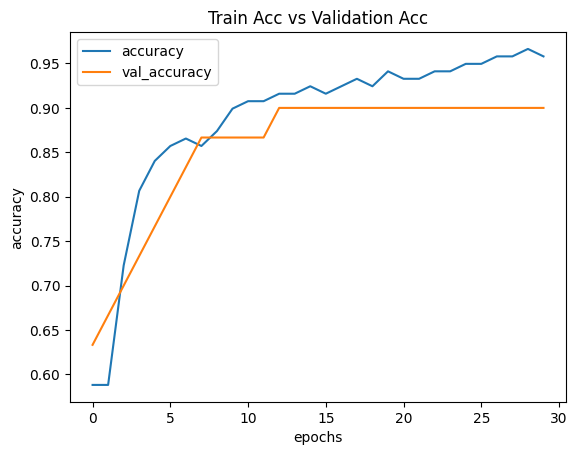

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Train Acc vs Validation Acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

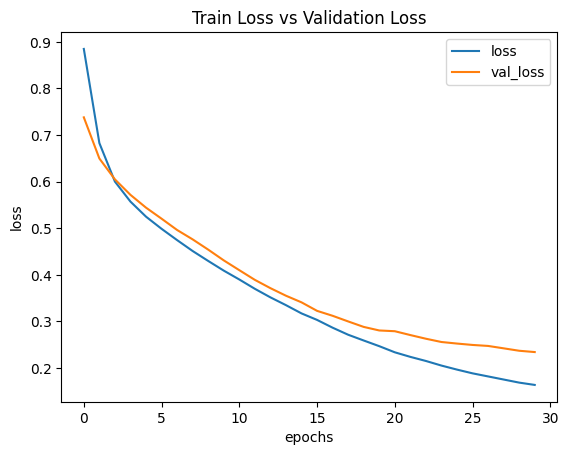

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Train Loss vs Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()

### Random Search


In [ ]:
study = optuna.create_study(direction='minimize', sampler= optuna.samplers.RandomSampler())

[I 2025-05-18 11:58:40,261] A new study created in memory with name: no-name-7a125ab2-a094-45c1-9a61-99af481c52f1


In [ ]:
study.optimize(objective,n_trials=15)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7485 - loss: 0.6034 - precision_203: 0.9459 - recall_203: 0.4105 - val_accuracy: 0.6667 - val_loss: 0.6025 - val_precision_203: 0.5000 - val_recall_203: 0.2000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7466 - loss: 0.6086 - precision_203: 0.9246 - recall_203: 0.4824 - val_accuracy: 0.6667 - val_loss: 0.5832 - val_precision_203: 0.5000 - val_recall_203: 0.2000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7666 - loss: 0.5460 - precision_203: 0.9063 - recall_203: 0.4397 - val_accuracy: 0.6667 - val_loss: 0.5662 - val_precision_203: 0.5000 - val_recall_203: 0.2000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7778 - loss: 0.5173 - precision_203: 0.8175 - recall_203: 0.4483 - val_accuracy: 0.7000 - val_loss: 0.5476 - val_precision_203: 0.6000 - val_recall_203: 0.3000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8243 - loss: 0.4889 - precision_203

[I 2025-05-18 12:01:46,621] Trial 15 finished with value: 0.290535569190979 and parameters: {'num_layers': 3, 'units_1': 8, 'activation_1': 'relu', 'units_2': 12, 'activation_2': 'relu', 'units_3': 11, 'activation_3': 'PReLU', 'optimizer': 'adam'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.3032 - loss: 0.7464 - precision_204: 0.3197 - recall_204: 0.6204 - val_accuracy: 0.2667 - val_loss: 0.7438 - val_precision_204: 0.2000 - val_recall_204: 0.4000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2931 - loss: 0.7413 - precision_204: 0.2920 - recall_204: 0.4370 - val_accuracy: 0.2000 - val_loss: 0.7394 - val_precision_204: 0.0625 - val_recall_204: 0.1000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3174 - loss: 0.7375 - precision_204: 0.2622 - recall_204: 0.5212 - val_accuracy: 0.2333 - val_loss: 0.7357 - val_precision_204: 0.0667 - val_recall_204: 0.1000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3560 - loss: 0.7259 - precision_204: 0.2938 - recall_204: 0.3996 - val_accuracy: 0.2333 - val_loss: 0.7324 - val_precision_204: 0.0667 - val_recall_204: 0.1000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3676 - loss: 0.7302 - precision_204: 

[I 2025-05-18 12:01:56,791] Trial 16 finished with value: 0.6889539361000061 and parameters: {'num_layers': 2, 'units_1': 13, 'activation_1': 'tanh', 'units_2': 12, 'activation_2': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5988 - loss: 0.6874 - precision_205: 0.0000e+00 - recall_205: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6421 - val_precision_205: 0.0000e+00 - val_recall_205: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6135 - loss: 0.6702 - precision_205: 0.0000e+00 - recall_205: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6391 - val_precision_205: 0.0000e+00 - val_recall_205: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5919 - loss: 0.6734 - precision_205: 0.0000e+00 - recall_205: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6370 - val_precision_205: 0.0000e+00 - val_recall_205: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5737 - loss: 0.6767 - precision_205: 0.0000e+00 - recall_205: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6331 - val_precision_205: 0.0000e+00 - val_recall_205: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━

[I 2025-05-18 12:02:09,382] Trial 17 finished with value: 0.2737266421318054 and parameters: {'num_layers': 4, 'units_1': 13, 'activation_1': 'relu', 'units_2': 5, 'activation_2': 'PReLU', 'units_3': 8, 'activation_3': 'PReLU', 'units_4': 11, 'activation_4': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5692 - loss: 0.6910 - precision_206: 0.0000e+00 - recall_206: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6446 - val_precision_206: 0.0000e+00 - val_recall_206: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6163 - loss: 0.6672 - precision_206: 0.0000e+00 - recall_206: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6436 - val_precision_206: 0.0000e+00 - val_recall_206: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6131 - loss: 0.6669 - precision_206: 0.0000e+00 - recall_206: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6425 - val_precision_206: 0.0000e+00 - val_recall_206: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6313 - loss: 0.6575 - precision_206: 0.0000e+00 - recall_206: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6418 - val_precision_206: 0.0000e+00 - val_recall_206: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━

[I 2025-05-18 12:02:20,387] Trial 18 finished with value: 0.2451842576265335 and parameters: {'num_layers': 3, 'units_1': 4, 'activation_1': 'sigmoid', 'units_2': 14, 'activation_2': 'relu', 'units_3': 13, 'activation_3': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7059 - loss: 0.6367 - precision_207: 0.0000e+00 - recall_207: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6412 - val_precision_207: 0.0000e+00 - val_recall_207: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5965 - loss: 0.6690 - precision_207: 0.0000e+00 - recall_207: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6375 - val_precision_207: 0.0000e+00 - val_recall_207: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5912 - loss: 0.6644 - precision_207: 0.0000e+00 - recall_207: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6312 - val_precision_207: 0.0000e+00 - val_recall_207: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6481 - loss: 0.6315 - precision_207: 0.0000e+00 - recall_207: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6184 - val_precision_207: 0.0000e+00 - val_recall_207: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 

[I 2025-05-18 12:02:31,939] Trial 19 finished with value: 0.3701079189777374 and parameters: {'num_layers': 4, 'units_1': 15, 'activation_1': 'PReLU', 'units_2': 6, 'activation_2': 'sigmoid', 'units_3': 16, 'activation_3': 'PReLU', 'units_4': 9, 'activation_4': 'tanh', 'optimizer': 'adam'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6172 - loss: 0.6371 - precision_208: 0.0000e+00 - recall_208: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6203 - val_precision_208: 0.0000e+00 - val_recall_208: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6228 - loss: 0.6221 - precision_208: 0.0000e+00 - recall_208: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6123 - val_precision_208: 0.0000e+00 - val_recall_208: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5737 - loss: 0.6603 - precision_208: 0.0000e+00 - recall_208: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6041 - val_precision_208: 0.0000e+00 - val_recall_208: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5866 - loss: 0.6420 - precision_208: 0.0000e+00 - recall_208: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5961 - val_precision_208: 0.0000e+00 - val_recall_208: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

[I 2025-05-18 12:02:41,199] Trial 20 finished with value: 0.3594886064529419 and parameters: {'num_layers': 4, 'units_1': 12, 'activation_1': 'tanh', 'units_2': 11, 'activation_2': 'sigmoid', 'units_3': 4, 'activation_3': 'relu', 'units_4': 11, 'activation_4': 'PReLU', 'optimizer': 'sgd'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5687 - loss: 0.6910 - precision_209: 0.0000e+00 - recall_209: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6800 - val_precision_209: 0.0000e+00 - val_recall_209: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5519 - loss: 0.6954 - precision_209: 0.0000e+00 - recall_209: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6745 - val_precision_209: 0.0000e+00 - val_recall_209: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6338 - loss: 0.6796 - precision_209: 0.0000e+00 - recall_209: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6709 - val_precision_209: 0.0000e+00 - val_recall_209: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5460 - loss: 0.6980 - precision_209: 0.0000e+00 - recall_209: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6673 - val_precision_209: 0.0000e+00 - val_recall_209: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 

[I 2025-05-18 12:02:49,568] Trial 21 finished with value: 0.6480844616889954 and parameters: {'num_layers': 3, 'units_1': 11, 'activation_1': 'sigmoid', 'units_2': 9, 'activation_2': 'tanh', 'units_3': 12, 'activation_3': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4366 - loss: 0.7154 - precision_210: 0.4366 - recall_210: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7138 - val_precision_210: 0.3333 - val_recall_210: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3584 - loss: 0.7060 - precision_210: 0.3552 - recall_210: 1.0000 - val_accuracy: 0.3000 - val_loss: 0.6958 - val_precision_210: 0.3103 - val_recall_210: 0.9000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5694 - loss: 0.6901 - precision_210: 0.4965 - recall_210: 0.7802 - val_accuracy: 0.6667 - val_loss: 0.6793 - val_precision_210: 0.0000e+00 - val_recall_210: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6296 - loss: 0.6771 - precision_210: 0.0000e+00 - recall_210: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6670 - val_precision_210: 0.0000e+00 - val_recall_210: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5123 - loss: 0

[I 2025-05-18 12:03:00,023] Trial 22 finished with value: 0.33583682775497437 and parameters: {'num_layers': 4, 'units_1': 6, 'activation_1': 'relu', 'units_2': 8, 'activation_2': 'sigmoid', 'units_3': 8, 'activation_3': 'tanh', 'units_4': 13, 'activation_4': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5345 - loss: 0.7411 - precision_211: 0.1809 - recall_211: 0.0819 - val_accuracy: 0.7000 - val_loss: 0.6380 - val_precision_211: 0.5556 - val_recall_211: 0.5000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5574 - loss: 0.6855 - precision_211: 0.4374 - recall_211: 0.4003 - val_accuracy: 0.7000 - val_loss: 0.6024 - val_precision_211: 0.5556 - val_recall_211: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7103 - loss: 0.6097 - precision_211: 0.5695 - recall_211: 0.4747 - val_accuracy: 0.7333 - val_loss: 0.5741 - val_precision_211: 0.6250 - val_recall_211: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7616 - loss: 0.5986 - precision_211: 0.8520 - recall_211: 0.5855 - val_accuracy: 0.8000 - val_loss: 0.5446 - val_precision_211: 0.7500 - val_recall_211: 0.6000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7678 - loss: 0.5284 - precision_211: 0

[I 2025-05-18 12:03:08,754] Trial 23 finished with value: 0.2757706940174103 and parameters: {'num_layers': 1, 'units_1': 5, 'activation_1': 'relu', 'optimizer': 'sgd'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6362 - loss: 0.6244 - precision_212: 0.0000e+00 - recall_212: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6098 - val_precision_212: 0.0000e+00 - val_recall_212: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5465 - loss: 0.6345 - precision_212: 0.0000e+00 - recall_212: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5980 - val_precision_212: 0.0000e+00 - val_recall_212: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5588 - loss: 0.6240 - precision_212: 0.8750 - recall_212: 0.0782 - val_accuracy: 0.7333 - val_loss: 0.5866 - val_precision_212: 1.0000 - val_recall_212: 0.2000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7170 - loss: 0.5624 - precision_212: 0.8125 - recall_212: 0.1197 - val_accuracy: 0.7333 - val_loss: 0.5761 - val_precision_212: 1.0000 - val_recall_212: 0.2000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6887 - 

[I 2025-05-18 12:03:18,196] Trial 24 finished with value: 0.31943073868751526 and parameters: {'num_layers': 2, 'units_1': 9, 'activation_1': 'relu', 'units_2': 8, 'activation_2': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3644 - loss: 0.7773 - precision_213: 0.2025 - recall_213: 0.2613 - val_accuracy: 0.3000 - val_loss: 0.7559 - val_precision_213: 0.1765 - val_recall_213: 0.3000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4590 - loss: 0.7274 - precision_213: 0.3685 - recall_213: 0.4611 - val_accuracy: 0.4000 - val_loss: 0.7285 - val_precision_213: 0.2500 - val_recall_213: 0.4000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5115 - loss: 0.7040 - precision_213: 0.4351 - recall_213: 0.5127 - val_accuracy: 0.5000 - val_loss: 0.7063 - val_precision_213: 0.3077 - val_recall_213: 0.4000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5294 - loss: 0.7031 - precision_213: 0.4630 - recall_213: 0.5192 - val_accuracy: 0.5667 - val_loss: 0.6862 - val_precision_213: 0.3636 - val_recall_213: 0.4000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5383 - loss: 0.6751 - precision_213: 0.

[I 2025-05-18 12:03:26,265] Trial 25 finished with value: 0.3098911941051483 and parameters: {'num_layers': 2, 'units_1': 9, 'activation_1': 'tanh', 'units_2': 9, 'activation_2': 'relu', 'optimizer': 'rmsprop'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5895 - loss: 0.6780 - precision_214: 0.0000e+00 - recall_214: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6497 - val_precision_214: 0.0000e+00 - val_recall_214: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5846 - loss: 0.6783 - precision_214: 0.0000e+00 - recall_214: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6494 - val_precision_214: 0.0000e+00 - val_recall_214: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5584 - loss: 0.6893 - precision_214: 0.0000e+00 - recall_214: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6492 - val_precision_214: 0.0000e+00 - val_recall_214: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6079 - loss: 0.6696 - precision_214: 0.0000e+00 - recall_214: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6490 - val_precision_214: 0.0000e+00 - val_recall_214: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━

[I 2025-05-18 12:03:35,349] Trial 26 finished with value: 0.6464036107063293 and parameters: {'num_layers': 3, 'units_1': 9, 'activation_1': 'sigmoid', 'units_2': 9, 'activation_2': 'sigmoid', 'units_3': 4, 'activation_3': 'PReLU', 'optimizer': 'sgd'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5905 - loss: 0.7563 - precision_215: 0.0000e+00 - recall_215: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6460 - val_precision_215: 0.0000e+00 - val_recall_215: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5952 - loss: 0.6845 - precision_215: 0.0000e+00 - recall_215: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6160 - val_precision_215: 0.0000e+00 - val_recall_215: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5837 - loss: 0.6582 - precision_215: 0.0000e+00 - recall_215: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5977 - val_precision_215: 0.0000e+00 - val_recall_215: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5787 - loss: 0.6308 - precision_215: 0.0000e+00 - recall_215: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5852 - val_precision_215: 0.0000e+00 - val_recall_215: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 

[I 2025-05-18 12:03:45,289] Trial 27 finished with value: 0.30801665782928467 and parameters: {'num_layers': 3, 'units_1': 15, 'activation_1': 'relu', 'units_2': 15, 'activation_2': 'PReLU', 'units_3': 11, 'activation_3': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.2268039882183075.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5548 - loss: 0.7025 - precision_216: 0.4413 - recall_216: 0.9960 - val_accuracy: 0.5667 - val_loss: 0.6533 - val_precision_216: 0.4286 - val_recall_216: 0.9000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7791 - loss: 0.5498 - precision_216: 0.6505 - recall_216: 0.9814 - val_accuracy: 0.6667 - val_loss: 0.5643 - val_precision_216: 0.5000 - val_recall_216: 0.9000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8129 - loss: 0.5022 - precision_216: 0.6810 - recall_216: 0.9707 - val_accuracy: 0.8000 - val_loss: 0.5070 - val_precision_216: 0.6429 - val_recall_216: 0.9000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8304 - loss: 0.4743 - precision_216: 0.6903 - recall_216: 0.9510 - val_accuracy: 0.8000 - val_loss: 0.4712 - val_precision_216: 0.7000 - val_recall_216: 0.7000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9054 - loss: 0.3996 - precision_216: 

[I 2025-05-18 12:03:54,574] Trial 28 finished with value: 0.2171706110239029 and parameters: {'num_layers': 1, 'units_1': 15, 'activation_1': 'tanh', 'optimizer': 'adam'}. Best is trial 28 with value: 0.2171706110239029.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4425 - loss: 0.7239 - precision_217: 0.4408 - recall_217: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7256 - val_precision_217: 0.3333 - val_recall_217: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3997 - loss: 0.7001 - precision_217: 0.3884 - recall_217: 1.0000 - val_accuracy: 0.4000 - val_loss: 0.7019 - val_precision_217: 0.3462 - val_recall_217: 0.9000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4632 - loss: 0.6851 - precision_217: 0.3651 - recall_217: 1.0000 - val_accuracy: 0.5667 - val_loss: 0.6844 - val_precision_217: 0.4211 - val_recall_217: 0.8000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6912 - loss: 0.6560 - precision_217: 0.5905 - recall_217: 1.0000 - val_accuracy: 0.7667 - val_loss: 0.6651 - val_precision_217: 0.6154 - val_recall_217: 0.8000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9073 - loss: 0.6378 - precision_217: 0.

[I 2025-05-18 12:04:04,377] Trial 29 finished with value: 0.3093406856060028 and parameters: {'num_layers': 3, 'units_1': 12, 'activation_1': 'PReLU', 'units_2': 4, 'activation_2': 'sigmoid', 'units_3': 5, 'activation_3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 28 with value: 0.2171706110239029.


In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_activation_1,params_activation_2,params_activation_3,params_activation_4,params_num_layers,params_optimizer,params_units_1,params_units_2,params_units_3,params_units_4,state
0,0,0.436318,2025-05-18 11:58:41.285770,2025-05-18 11:58:51.646595,0 days 00:00:10.360825,relu,sigmoid,relu,relu,4,adam,8,6.0,4.0,4.0,COMPLETE
1,1,0.578676,2025-05-18 11:58:51.649022,2025-05-18 11:59:00.022228,0 days 00:00:08.373206,sigmoid,tanh,NaN,NaN,2,sgd,5,8.0,NaN,NaN,COMPLETE
2,2,0.690238,2025-05-18 11:59:00.024903,2025-05-18 11:59:08.412238,0 days 00:00:08.387335,tanh,PReLU,NaN,NaN,2,adagrad,5,11.0,NaN,NaN,COMPLETE
3,3,0.656328,2025-05-18 11:59:08.414661,2025-05-18 11:59:17.570378,0 days 00:00:09.155717,tanh,relu,NaN,NaN,2,adagrad,12,12.0,NaN,NaN,COMPLETE
4,4,0.546209,2025-05-18 11:59:17.573242,2025-05-18 11:59:26.775949,0 days 00:00:09.202707,relu,NaN,NaN,NaN,1,adagrad,7,NaN,NaN,NaN,COMPLETE
5,5,0.438529,2025-05-18 11:59:26.778183,2025-05-18 11:59:36.524194,0 days 00:00:09.746011,sigmoid,PReLU,relu,NaN,3,rmsprop,14,11.0,5.0,NaN,COMPLETE
6,6,0.333097,2025-05-18 11:59:36.526478,2025-05-18 11:59:46.793007,0 days 00:00:10.266529,tanh,PReLU,NaN,NaN,2,adam,13,10.0,NaN,NaN,COMPLETE
7,7,0.342281,2025-05-18 11:59:46.795726,2025-05-18 11:59:54.695236,0 days 00:00:07.899510,sigmoid,NaN,NaN,NaN,1,adam,15,NaN,NaN,NaN,COMPLETE
8,8,0.307132,2025-05-18 11:59:54.697505,2025-05-18 12:00:06.447264,0 days 00:00:11.749759,relu,sigmoid,PReLU,tanh,4,adam,15,13.0,7.0,7.0,COMPLETE
9,9,0.676980,2025-05-18 12:00:06.450408,2025-05-18 12:00:16.272349,0 days 00:00:09.821941,PReLU,PReLU,PReLU,NaN,3,adagrad,10,7.0,13.0,NaN,COMPLETE


In [ ]:
study.best_params

{'num_layers': 1, 'units_1': 15, 'activation_1': 'tanh', 'optimizer': 'adam'}

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))

model.add(keras.layers.Dense(units=15, activation='tanh'))

model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(x, y, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6130 - loss: 0.6614 - precision_218: 0.5063 - recall_218: 1.0000 - val_accuracy: 0.6667 - val_loss: 0.5700 - val_precision_218: 0.5000 - val_recall_218: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7390 - loss: 0.5488 - precision_218: 0.6112 - recall_218: 0.9838 - val_accuracy: 0.6667 - val_loss: 0.5056 - val_precision_218: 0.5000 - val_recall_218: 0.7000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7691 - loss: 0.5231 - precision_218: 0.6293 - recall_218: 0.7645 - val_accuracy: 0.8000 - val_loss: 0.4661 - val_precision_218: 0.7000 - val_recall_218: 0.7000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7419 - loss: 0.5064 - precision_218: 0.6268 - recall_218: 0.8435 - val_accuracy: 0.8667 - val_loss: 0.4374 - val_precision_218: 0.8750 - val_recall_218: 0.7000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8382 - loss: 0.4123 - precision_218: 

In [ ]:
model.summary()

Model: "sequential_223"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_759 (Dense)               │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_760 (Dense)               │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364 (1.43 KB)

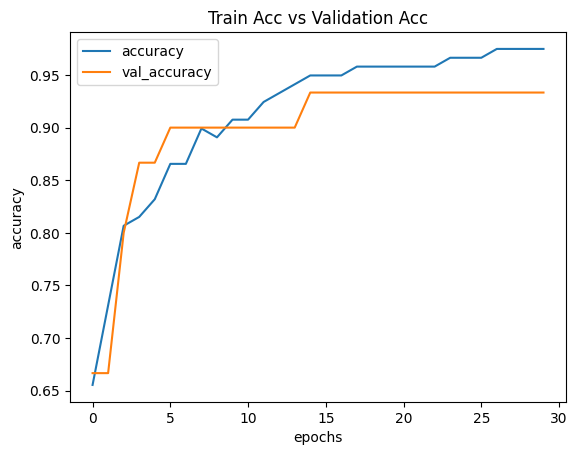

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Train Acc vs Validation Acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

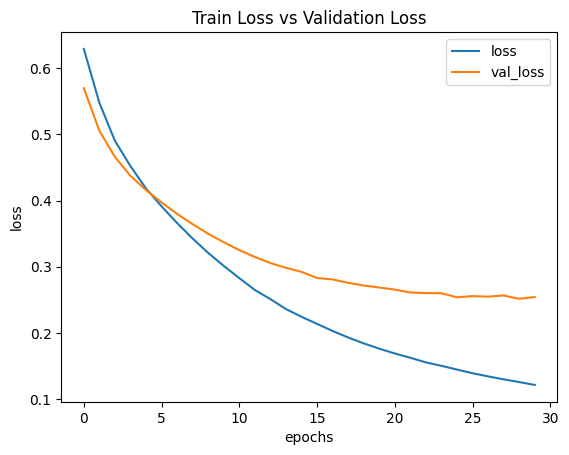

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Train Loss vs Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()

### Bayesian Search

In [ ]:
study = optuna.create_study(direction='minimize', sampler = optuna.samplers.TPESampler())

[I 2025-05-18 12:04:55,057] A new study created in memory with name: no-name-e9c0e78f-7770-449f-b045-4e07c84518c8


In [ ]:
study.optimize(objective, n_trials=15)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5547 - loss: 0.6961 - precision_219: 0.0000e+00 - recall_219: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6496 - val_precision_219: 0.0000e+00 - val_recall_219: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5535 - loss: 0.6950 - precision_219: 0.0000e+00 - recall_219: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6474 - val_precision_219: 0.0000e+00 - val_recall_219: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5767 - loss: 0.6841 - precision_219: 0.0000e+00 - recall_219: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6442 - val_precision_219: 0.0000e+00 - val_recall_219: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5622 - loss: 0.6869 - precision_219: 0.0000e+00 - recall_219: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6425 - val_precision_219: 0.0000e+00 - val_recall_219: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 

[I 2025-05-18 12:05:04,360] Trial 0 finished with value: 0.4798453152179718 and parameters: {'num_layers': 3, 'units_1': 5, 'activation_1': 'sigmoid', 'units_2': 6, 'activation_2': 'sigmoid', 'units_3': 16, 'activation_3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.4798453152179718.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4863 - loss: 0.7666 - precision_220: 0.4234 - recall_220: 0.4928 - val_accuracy: 0.5000 - val_loss: 0.7455 - val_precision_220: 0.3077 - val_recall_220: 0.4000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6722 - loss: 0.6472 - precision_220: 0.5819 - recall_220: 0.4692 - val_accuracy: 0.6667 - val_loss: 0.6675 - val_precision_220: 0.5000 - val_recall_220: 0.4000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7294 - loss: 0.6099 - precision_220: 0.6922 - recall_220: 0.5778 - val_accuracy: 0.6000 - val_loss: 0.6097 - val_precision_220: 0.3333 - val_recall_220: 0.2000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8007 - loss: 0.5144 - precision_220: 0.8136 - recall_220: 0.6185 - val_accuracy: 0.6333 - val_loss: 0.5594 - val_precision_220: 0.4286 - val_recall_220: 0.3000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7759 - loss: 0.5249 - precision_220: 

[I 2025-05-18 12:05:15,099] Trial 1 finished with value: 0.28154879808425903 and parameters: {'num_layers': 2, 'units_1': 16, 'activation_1': 'tanh', 'units_2': 14, 'activation_2': 'PReLU', 'optimizer': 'adam'}. Best is trial 1 with value: 0.28154879808425903.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.6854 - loss: 0.6400 - precision_221: 0.6054 - recall_221: 0.8412 - val_accuracy: 0.6000 - val_loss: 0.6574 - val_precision_221: 0.4375 - val_recall_221: 0.7000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7700 - loss: 0.6065 - precision_221: 0.6435 - recall_221: 0.7804 - val_accuracy: 0.6667 - val_loss: 0.6268 - val_precision_221: 0.5000 - val_recall_221: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7638 - loss: 0.5853 - precision_221: 0.6834 - recall_221: 0.7496 - val_accuracy: 0.7333 - val_loss: 0.6001 - val_precision_221: 0.6250 - val_recall_221: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7636 - loss: 0.5638 - precision_221: 0.7233 - recall_221: 0.6797 - val_accuracy: 0.7667 - val_loss: 0.5665 - val_precision_221: 0.7143 - val_recall_221: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8574 - loss: 0.5098 - precision_22

[I 2025-05-18 12:05:27,395] Trial 2 finished with value: 0.2585200369358063 and parameters: {'num_layers': 2, 'units_1': 6, 'activation_1': 'PReLU', 'units_2': 13, 'activation_2': 'PReLU', 'optimizer': 'adam'}. Best is trial 2 with value: 0.2585200369358063.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4359 - loss: 0.7327 - precision_222: 0.4359 - recall_222: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7800 - val_precision_222: 0.3333 - val_recall_222: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3806 - loss: 0.7483 - precision_222: 0.3806 - recall_222: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7665 - val_precision_222: 0.3333 - val_recall_222: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3932 - loss: 0.7307 - precision_222: 0.3932 - recall_222: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7559 - val_precision_222: 0.3333 - val_recall_222: 1.0000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4607 - loss: 0.6939 - precision_222: 0.4607 - recall_222: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7469 - val_precision_222: 0.3333 - val_recall_222: 1.0000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3255 - loss: 0.7403 - precision_222

[I 2025-05-18 12:05:38,867] Trial 3 finished with value: 0.6632014513015747 and parameters: {'num_layers': 3, 'units_1': 9, 'activation_1': 'sigmoid', 'units_2': 6, 'activation_2': 'relu', 'units_3': 10, 'activation_3': 'tanh', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.2585200369358063.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6076 - loss: 0.6982 - precision_223: 0.0000e+00 - recall_223: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6630 - val_precision_223: 0.0000e+00 - val_recall_223: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5675 - loss: 0.7037 - precision_223: 0.0000e+00 - recall_223: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6593 - val_precision_223: 0.0000e+00 - val_recall_223: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6187 - loss: 0.6774 - precision_223: 0.0000e+00 - recall_223: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6519 - val_precision_223: 0.0000e+00 - val_recall_223: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6531 - loss: 0.6629 - precision_223: 0.0000e+00 - recall_223: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6457 - val_precision_223: 0.0000e+00 - val_recall_223: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

[I 2025-05-18 12:05:48,475] Trial 4 finished with value: 0.2638530433177948 and parameters: {'num_layers': 2, 'units_1': 7, 'activation_1': 'sigmoid', 'units_2': 12, 'activation_2': 'tanh', 'optimizer': 'adam'}. Best is trial 2 with value: 0.2585200369358063.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3283 - loss: 0.7051 - precision_224: 0.3274 - recall_224: 0.7622 - val_accuracy: 0.4000 - val_loss: 0.7027 - val_precision_224: 0.3462 - val_recall_224: 0.9000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3144 - loss: 0.7063 - precision_224: 0.3171 - recall_224: 0.6835 - val_accuracy: 0.4000 - val_loss: 0.7006 - val_precision_224: 0.3333 - val_recall_224: 0.8000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3531 - loss: 0.7028 - precision_224: 0.3535 - recall_224: 0.6514 - val_accuracy: 0.4000 - val_loss: 0.6988 - val_precision_224: 0.3182 - val_recall_224: 0.7000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2851 - loss: 0.7042 - precision_224: 0.2725 - recall_224: 0.6600 - val_accuracy: 0.3667 - val_loss: 0.6973 - val_precision_224: 0.2857 - val_recall_224: 0.6000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3667 - loss: 0.6968 - precision_224: 0

[I 2025-05-18 12:05:57,744] Trial 5 finished with value: 0.6761123538017273 and parameters: {'num_layers': 3, 'units_1': 15, 'activation_1': 'sigmoid', 'units_2': 11, 'activation_2': 'relu', 'units_3': 9, 'activation_3': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.2585200369358063.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4916 - loss: 0.7760 - precision_225: 0.3720 - recall_225: 0.3513 - val_accuracy: 0.6000 - val_loss: 0.7730 - val_precision_225: 0.3333 - val_recall_225: 0.2000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5556 - loss: 0.7020 - precision_225: 0.4025 - recall_225: 0.3621 - val_accuracy: 0.6333 - val_loss: 0.7420 - val_precision_225: 0.4000 - val_recall_225: 0.2000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5681 - loss: 0.7030 - precision_225: 0.4569 - recall_225: 0.2694 - val_accuracy: 0.6333 - val_loss: 0.7185 - val_precision_225: 0.4000 - val_recall_225: 0.2000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6102 - loss: 0.6616 - precision_225: 0.4425 - recall_225: 0.2562 - val_accuracy: 0.6333 - val_loss: 0.6995 - val_precision_225: 0.4000 - val_recall_225: 0.2000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5654 - loss: 0.6885 - precision_225: 0.

[I 2025-05-18 12:06:04,527] Trial 6 finished with value: 0.33207982778549194 and parameters: {'num_layers': 1, 'units_1': 5, 'activation_1': 'relu', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.2585200369358063.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.3732 - loss: 0.7702 - precision_226: 0.3732 - recall_226: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7552 - val_precision_226: 0.3333 - val_recall_226: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4076 - loss: 0.7368 - precision_226: 0.4076 - recall_226: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7276 - val_precision_226: 0.3333 - val_recall_226: 1.0000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3901 - loss: 0.7150 - precision_226: 0.3954 - recall_226: 0.9452 - val_accuracy: 0.3000 - val_loss: 0.7076 - val_precision_226: 0.2963 - val_recall_226: 0.8000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3797 - loss: 0.7029 - precision_226: 0.3865 - recall_226: 0.6609 - val_accuracy: 0.5333 - val_loss: 0.6923 - val_precision_226: 0.3571 - val_recall_226: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4997 - loss: 0.6974 - precision_226: 0.

[I 2025-05-18 12:06:12,677] Trial 7 finished with value: 0.6247856616973877 and parameters: {'num_layers': 4, 'units_1': 14, 'activation_1': 'relu', 'units_2': 12, 'activation_2': 'tanh', 'units_3': 7, 'activation_3': 'relu', 'units_4': 14, 'activation_4': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.2585200369358063.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4555 - loss: 0.7947 - precision_227: 0.4493 - recall_227: 1.0000 - val_accuracy: 0.3333 - val_loss: 0.7654 - val_precision_227: 0.3333 - val_recall_227: 1.0000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4249 - loss: 0.7180 - precision_227: 0.3892 - recall_227: 0.9581 - val_accuracy: 0.4667 - val_loss: 0.7082 - val_precision_227: 0.3750 - val_recall_227: 0.9000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5860 - loss: 0.6566 - precision_227: 0.5075 - recall_227: 1.0000 - val_accuracy: 0.5667 - val_loss: 0.6594 - val_precision_227: 0.4211 - val_recall_227: 0.8000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6556 - loss: 0.6039 - precision_227: 0.5308 - recall_227: 0.8669 - val_accuracy: 0.7000 - val_loss: 0.6072 - val_precision_227: 0.5333 - val_recall_227: 0.8000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8230 - loss: 0.5459 - precision_227: 0.

[I 2025-05-18 12:06:22,412] Trial 8 finished with value: 0.2974274754524231 and parameters: {'num_layers': 3, 'units_1': 16, 'activation_1': 'relu', 'units_2': 16, 'activation_2': 'PReLU', 'units_3': 13, 'activation_3': 'PReLU', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.2585200369358063.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5293 - loss: 0.6968 - precision_228: 0.0000e+00 - recall_228: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6596 - val_precision_228: 0.0000e+00 - val_recall_228: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5870 - loss: 0.6781 - precision_228: 0.0000e+00 - recall_228: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6594 - val_precision_228: 0.0000e+00 - val_recall_228: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5452 - loss: 0.6922 - precision_228: 0.0000e+00 - recall_228: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6591 - val_precision_228: 0.0000e+00 - val_recall_228: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6163 - loss: 0.6720 - precision_228: 0.0000e+00 - recall_228: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6589 - val_precision_228: 0.0000e+00 - val_recall_228: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

[I 2025-05-18 12:06:30,826] Trial 9 finished with value: 0.6553918123245239 and parameters: {'num_layers': 4, 'units_1': 16, 'activation_1': 'tanh', 'units_2': 12, 'activation_2': 'relu', 'units_3': 14, 'activation_3': 'sigmoid', 'units_4': 10, 'activation_4': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.2585200369358063.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5479 - loss: 0.8051 - precision_229: 0.4476 - recall_229: 0.7866 - val_accuracy: 0.5333 - val_loss: 0.8183 - val_precision_229: 0.4000 - val_recall_229: 0.8000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6441 - loss: 0.6314 - precision_229: 0.5364 - recall_229: 0.8149 - val_accuracy: 0.5333 - val_loss: 0.7483 - val_precision_229: 0.4000 - val_recall_229: 0.8000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6576 - loss: 0.6566 - precision_229: 0.5649 - recall_229: 0.7155 - val_accuracy: 0.6000 - val_loss: 0.6903 - val_precision_229: 0.4444 - val_recall_229: 0.8000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7194 - loss: 0.5946 - precision_229: 0.4852 - recall_229: 0.6161 - val_accuracy: 0.6333 - val_loss: 0.6473 - val_precision_229: 0.4706 - val_recall_229: 0.8000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7740 - loss: 0.4818 - precision_229: 

[I 2025-05-18 12:06:40,366] Trial 10 finished with value: 0.2850506603717804 and parameters: {'num_layers': 1, 'units_1': 11, 'activation_1': 'PReLU', 'optimizer': 'adam'}. Best is trial 2 with value: 0.2585200369358063.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6418 - loss: 0.6932 - precision_230: 0.0000e+00 - recall_230: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6711 - val_precision_230: 0.0000e+00 - val_recall_230: 0.0000e+00
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5451 - loss: 0.7158 - precision_230: 0.0000e+00 - recall_230: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6482 - val_precision_230: 0.0000e+00 - val_recall_230: 0.0000e+00
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6209 - loss: 0.6441 - precision_230: 0.0000e+00 - recall_230: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6235 - val_precision_230: 0.0000e+00 - val_recall_230: 0.0000e+00
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6056 - loss: 0.6288 - precision_230: 0.0000e+00 - recall_230: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.5985 - val_precision_230: 0.0000e+00 - val_recall_230: 0.0000e+00
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

[I 2025-05-18 12:06:50,345] Trial 11 finished with value: 0.23899544775485992 and parameters: {'num_layers': 2, 'units_1': 8, 'activation_1': 'PReLU', 'units_2': 8, 'activation_2': 'tanh', 'optimizer': 'adam'}. Best is trial 11 with value: 0.23899544775485992.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5425 - loss: 0.7054 - precision_231: 0.0000e+00 - recall_231: 0.0000e+00 - val_accuracy: 0.5333 - val_loss: 0.6837 - val_precision_231: 0.1667 - val_recall_231: 0.1000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4521 - loss: 0.7211 - precision_231: 0.1518 - recall_231: 0.0301 - val_accuracy: 0.6333 - val_loss: 0.6433 - val_precision_231: 0.4286 - val_recall_231: 0.3000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5998 - loss: 0.6469 - precision_231: 0.2449 - recall_231: 0.0462 - val_accuracy: 0.7000 - val_loss: 0.6054 - val_precision_231: 0.6000 - val_recall_231: 0.3000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6954 - loss: 0.5719 - precision_231: 0.8037 - recall_231: 0.1553 - val_accuracy: 0.8000 - val_loss: 0.5734 - val_precision_231: 0.8333 - val_recall_231: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7690 - loss: 0.5722 - precisi

[I 2025-05-18 12:06:59,770] Trial 12 finished with value: 0.2752137780189514 and parameters: {'num_layers': 2, 'units_1': 8, 'activation_1': 'PReLU', 'units_2': 8, 'activation_2': 'tanh', 'optimizer': 'adam'}. Best is trial 11 with value: 0.23899544775485992.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4733 - loss: 0.7494 - precision_232: 0.4130 - recall_232: 1.0000 - val_accuracy: 0.6667 - val_loss: 0.6347 - val_precision_232: 0.5000 - val_recall_232: 0.9000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6357 - loss: 0.6254 - precision_232: 0.4705 - recall_232: 1.0000 - val_accuracy: 0.7667 - val_loss: 0.5604 - val_precision_232: 0.6154 - val_recall_232: 0.8000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8382 - loss: 0.4843 - precision_232: 0.6983 - recall_232: 0.9793 - val_accuracy: 0.7667 - val_loss: 0.5275 - val_precision_232: 0.6364 - val_recall_232: 0.7000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8660 - loss: 0.4519 - precision_232: 0.7440 - recall_232: 0.9571 - val_accuracy: 0.8000 - val_loss: 0.5067 - val_precision_232: 0.7000 - val_recall_232: 0.7000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8940 - loss: 0.4328 - precision_232: 0.

[I 2025-05-18 12:07:07,831] Trial 13 finished with value: 0.27242860198020935 and parameters: {'num_layers': 1, 'units_1': 11, 'activation_1': 'PReLU', 'optimizer': 'adam'}. Best is trial 11 with value: 0.23899544775485992.


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.3752 - loss: 0.8847 - precision_233: 0.3178 - recall_233: 0.5247 - val_accuracy: 0.5000 - val_loss: 0.7851 - val_precision_233: 0.3529 - val_recall_233: 0.6000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3688 - loss: 0.8194 - precision_233: 0.3028 - recall_233: 0.5207 - val_accuracy: 0.5000 - val_loss: 0.7311 - val_precision_233: 0.3333 - val_recall_233: 0.5000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4307 - loss: 0.7717 - precision_233: 0.3193 - recall_233: 0.3986 - val_accuracy: 0.5333 - val_loss: 0.7035 - val_precision_233: 0.3571 - val_recall_233: 0.5000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4341 - loss: 0.7380 - precision_233: 0.2808 - recall_233: 0.3690 - val_accuracy: 0.6000 - val_loss: 0.6812 - val_precision_233: 0.4167 - val_recall_233: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4237 - loss: 0.7358 - precision_233: 0

[I 2025-05-18 12:07:17,911] Trial 14 finished with value: 0.48930782079696655 and parameters: {'num_layers': 2, 'units_1': 4, 'activation_1': 'PReLU', 'units_2': 9, 'activation_2': 'PReLU', 'optimizer': 'adam'}. Best is trial 11 with value: 0.23899544775485992.


In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_activation_1,params_activation_2,params_activation_3,params_activation_4,params_num_layers,params_optimizer,params_units_1,params_units_2,params_units_3,params_units_4,state
0,0,0.479845,2025-05-18 12:04:55.562343,2025-05-18 12:05:04.359141,0 days 00:00:08.796798,sigmoid,sigmoid,tanh,NaN,3,rmsprop,5,6.0,16.0,NaN,COMPLETE
1,1,0.281549,2025-05-18 12:05:04.362466,2025-05-18 12:05:15.098688,0 days 00:00:10.736222,tanh,PReLU,NaN,NaN,2,adam,16,14.0,NaN,NaN,COMPLETE
2,2,0.258520,2025-05-18 12:05:15.101063,2025-05-18 12:05:27.394246,0 days 00:00:12.293183,PReLU,PReLU,NaN,NaN,2,adam,6,13.0,NaN,NaN,COMPLETE
3,3,0.663201,2025-05-18 12:05:27.396889,2025-05-18 12:05:38.866489,0 days 00:00:11.469600,sigmoid,relu,tanh,NaN,3,adagrad,9,6.0,10.0,NaN,COMPLETE
4,4,0.263853,2025-05-18 12:05:38.869254,2025-05-18 12:05:48.473969,0 days 00:00:09.604715,sigmoid,tanh,NaN,NaN,2,adam,7,12.0,NaN,NaN,COMPLETE
5,5,0.676112,2025-05-18 12:05:48.476466,2025-05-18 12:05:57.742937,0 days 00:00:09.266471,sigmoid,relu,sigmoid,NaN,3,adagrad,15,11.0,9.0,NaN,COMPLETE
6,6,0.332080,2025-05-18 12:05:57.745345,2025-05-18 12:06:04.526063,0 days 00:00:06.780718,relu,NaN,NaN,NaN,1,sgd,5,NaN,NaN,NaN,COMPLETE
7,7,0.624786,2025-05-18 12:06:04.528292,2025-05-18 12:06:12.676088,0 days 00:00:08.147796,relu,tanh,relu,sigmoid,4,sgd,14,12.0,7.0,14.0,COMPLETE
8,8,0.297427,2025-05-18 12:06:12.678967,2025-05-18 12:06:22.411607,0 days 00:00:09.732640,relu,PReLU,PReLU,NaN,3,rmsprop,16,16.0,13.0,NaN,COMPLETE
9,9,0.655392,2025-05-18 12:06:22.413456,2025-05-18 12:06:30.824403,0 days 00:00:08.410947,tanh,relu,sigmoid,sigmoid,4,adagrad,16,12.0,14.0,10.0,COMPLETE


In [ ]:
study.best_params

{'num_layers': 2,
 'units_1': 8,
 'activation_1': 'PReLU',
 'units_2': 8,
 'activation_2': 'tanh',
 'optimizer': 'adam'}

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))

model.add(keras.layers.Dense(units=8))
model.add(PReLU())
model.add(keras.layers.Dense(units=8, activation='tanh'))

model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
history = model.fit(x, y, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.3876 - loss: 0.7996 - precision_234: 0.3231 - recall_234: 0.2905 - val_accuracy: 0.5667 - val_loss: 0.6960 - val_precision_234: 0.3333 - val_recall_234: 0.3000
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5463 - loss: 0.7185 - precision_234: 0.4292 - recall_234: 0.4159 - val_accuracy: 0.6333 - val_loss: 0.6561 - val_precision_234: 0.4286 - val_recall_234: 0.3000
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7211 - loss: 0.6558 - precision_234: 0.6326 - recall_234: 0.5147 - val_accuracy: 0.6667 - val_loss: 0.6274 - val_precision_234: 0.5000 - val_recall_234: 0.3000
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7978 - loss: 0.5949 - precision_234: 0.7378 - recall_234: 0.6730 - val_accuracy: 0.8000 - val_loss: 0.6055 - val_precision_234: 0.8333 - val_recall_234: 0.5000
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7652 - loss: 0.6018 - precision_234: 0.

In [ ]:
model.summary()

Model: "sequential_239"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_811 (Dense)               │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_142 (PReLU)             │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_812 (Dense)               │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_813 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533 (2.09 KB)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 356 (1.39 KB)

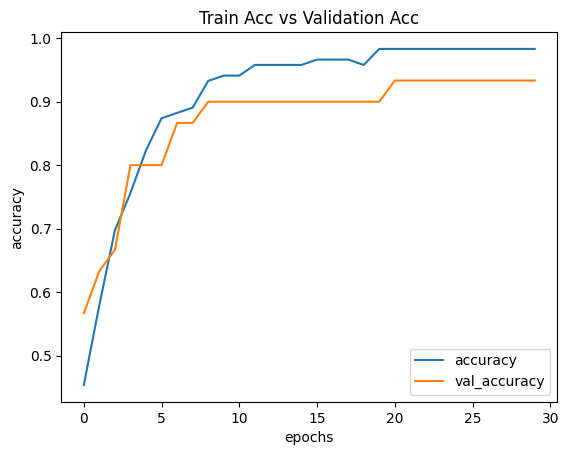

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Train Acc vs Validation Acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

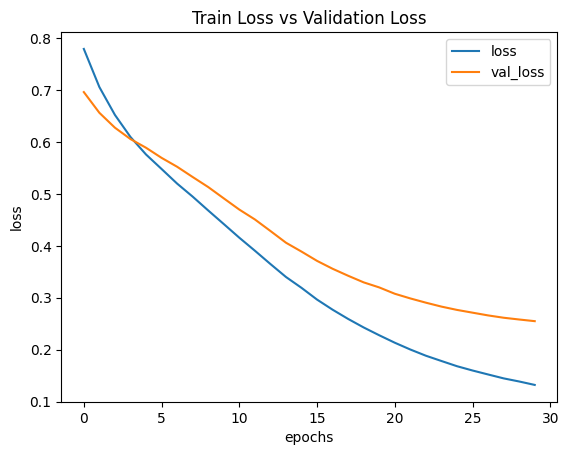

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Train Loss vs Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss","val_loss"])
plt.show()

In [ ]:
# 1.Grid search
# accuracy: 0.9650 - loss: 0.1510 - precision_187: 0.9225 - recall_187: 0.9943 - val_accuracy: 0.9000 - val_loss: 0.2342 - val_precision_187: 1.0000 - val_recall_187: 0.7000
# Overfitting  Model performs very well on training , training accuracy is higher than the validation accuracy

# 2.Random search
# accuracy: 0.9806 - loss: 0.1183 - precision_218: 0.9507 - recall_218: 1.0000 - val_accuracy: 0.9333 - val_loss: 0.2543 - val_precision_218: 1.0000 - val_recall_218: 0.8000
# Balanced  Model performs well on both training and validation  no much difference between training and testing

# 3.Bayesian search
# accuracy: 0.9835 - loss: 0.1468 - precision_234: 0.9616 - recall_234: 1.0000 - val_accuracy: 0.9333 - val_loss: 0.2549 - val_precision_234: 1.0000 - val_recall_234: 0.8000
# Balanced  Similar performance to random search  no much difference between training and testing